# 06. Машинное обучение c учителем

## Регрессия

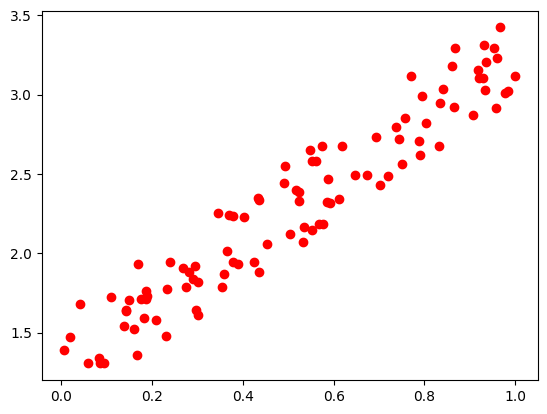

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num = 100
X = np.random.rand(num, 1)
y = 1 + 2*X + .6*np.random.rand(num, 1)

plt.figure()
plt.scatter(X, y, c='r')
plt.show()

#print(X)
#print(y)

0.9144167508538183
[1.30868803] [[1.92107958]]
[[2.26922782]]
[1.30868803 3.2297676 ]


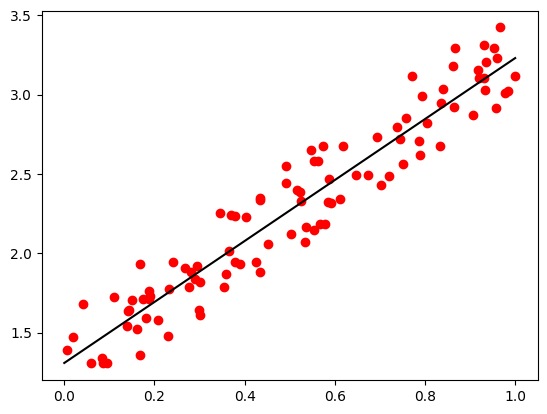

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
# y = w0 + w1*x1 + w2*x2 + w3*x3 + ...
# reg.coef_ = w1, w2, w3, ...
# reg.intercept_ = w0
print(reg.intercept_, reg.coef_)
print(reg.predict(np.array([[.5]])))

X_test = np.array([0, 1])
y_test = reg.intercept_ + reg.coef_[0]*X_test

print(y_test)

plt.figure()
plt.scatter(X, y, c='red')
plt.plot(X_test, y_test, c='black')
plt.show()

## Предобработка данных

### 1. Загрузка набора данных и уменьшение пространства признаков

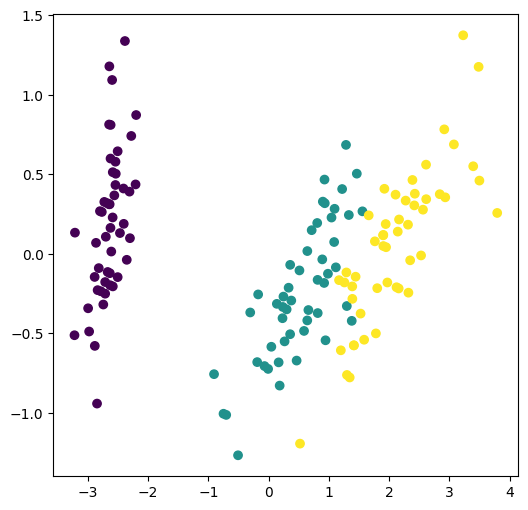

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(iris['data'])
y = iris['target']

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### 2. Нормализация данных

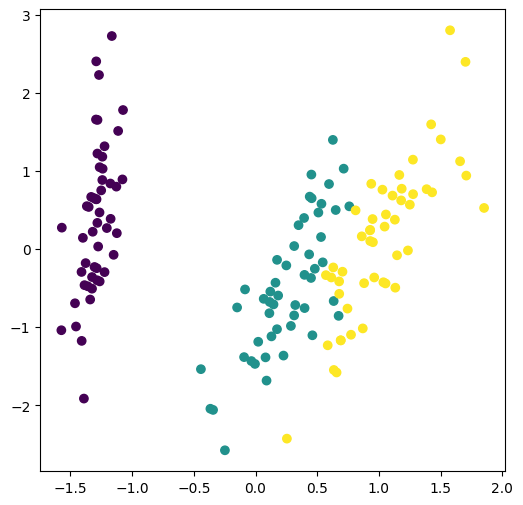

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X_ = X_scale.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_[:, 0], X_[:, 1], c=y)
plt.show()

### 3. Разделение данных на обучающую и тренировочную выборки

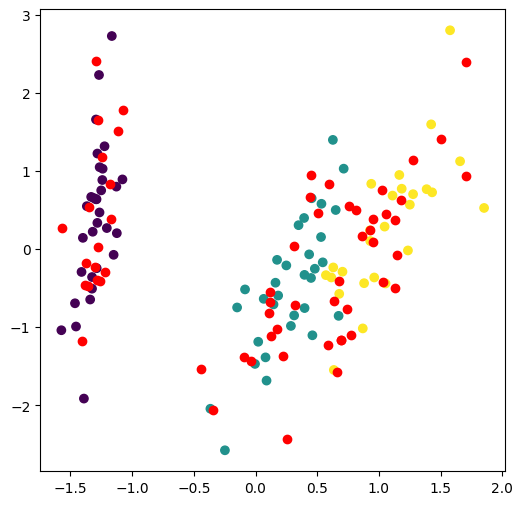

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.4)


plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red')
plt.show()

## Модели классификации

### 1. K ближайших соседей (KNN)

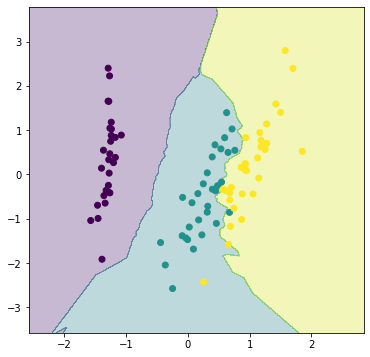

KNeighborsClassifier:  0.95


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p=2).fit(X_train, y_train)

###################### код для построения графика

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

###################### код для вычисления достоверности классификатора

from sklearn.metrics import accuracy_score
print ('KNeighborsClassifier: ',
       accuracy_score(model.predict(X_test), y_test))

### 2. Дерево принятия решений

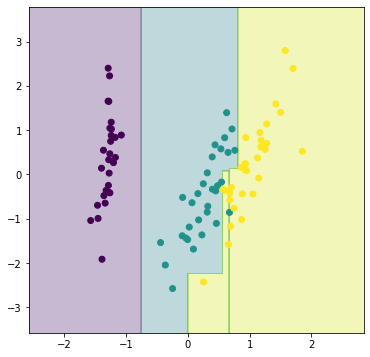

DecisionTreeClassifier:  0.9833333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

###################### код для построения графика

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

###################### код для вычисления достоверности классификатора

from sklearn.metrics import accuracy_score
print('DecisionTreeClassifier: ',
       accuracy_score(model.predict(X_test), y_test))

[Text(418.5, 757.1571428571428, 'X[0] <= -0.76\nentropy = 1.578\nsamples = 90\nvalue = [27, 29, 34]'),
 Text(334.8, 640.6714285714286, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(502.20000000000005, 640.6714285714286, 'X[0] <= 0.664\nentropy = 0.995\nsamples = 63\nvalue = [0, 29, 34]'),
 Text(418.5, 524.1857142857143, 'X[0] <= 0.558\nentropy = 0.533\nsamples = 33\nvalue = [0, 29, 4]'),
 Text(251.10000000000002, 407.7, 'X[1] <= -2.058\nentropy = 0.229\nsamples = 27\nvalue = [0, 26, 1]'),
 Text(167.4, 291.21428571428567, 'X[1] <= -2.504\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(83.7, 174.7285714285714, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 174.7285714285714, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(334.8, 291.21428571428567, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(585.9, 407.7, 'X[0] <= 0.59\nentropy = 1.0\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(502.20000000000005, 291.21428571428567, 'ent

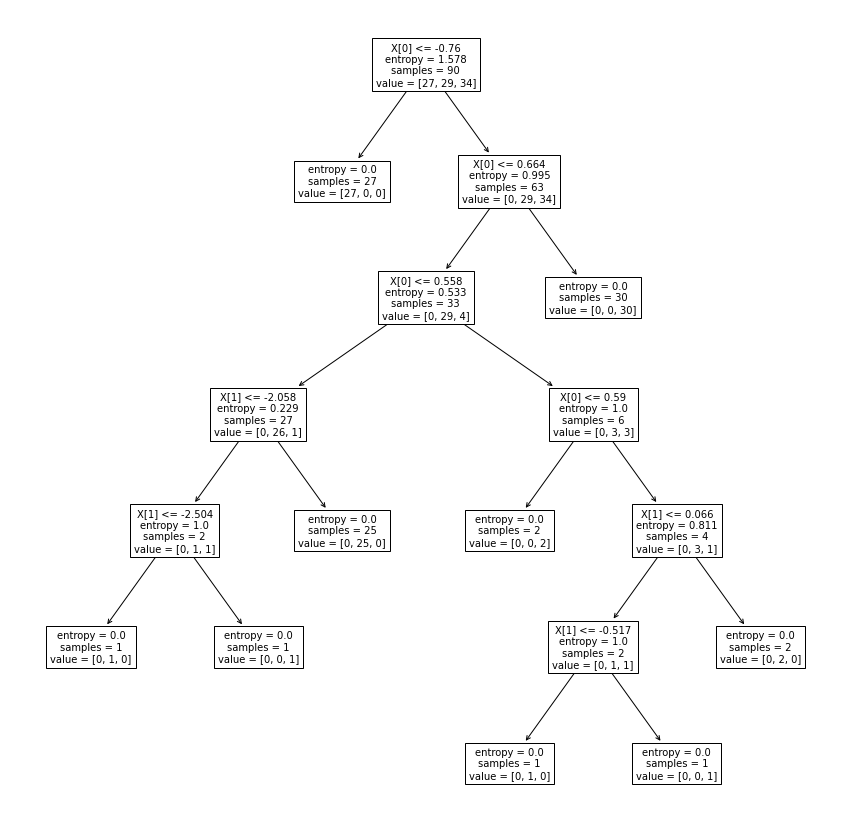

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(model, fontsize=10)

### 3. Случайный лес (Random Forest)

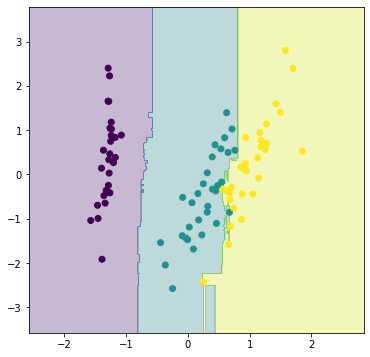

RandomForestClassifier:  0.9666666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42).fit(X_train,y_train)

###################### код для построения графика

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

###################### код для вычисления достоверности классификатора

from sklearn.metrics import accuracy_score
print('RandomForestClassifier: ',
       accuracy_score(model.predict(X_test), y_test))


### 4. Метод опорных векторов (SVM)

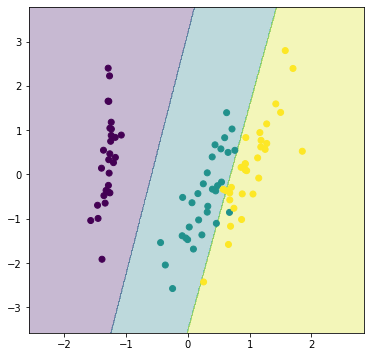

SVM:  0.9666666666666667


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1, gamma=.000001).fit(X_train,y_train)

###################### код для построения графика

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

###################### код для вычисления достоверности классификатора

from sklearn.metrics import accuracy_score
print('SVM: ',
       accuracy_score(model.predict(X_test), y_test))

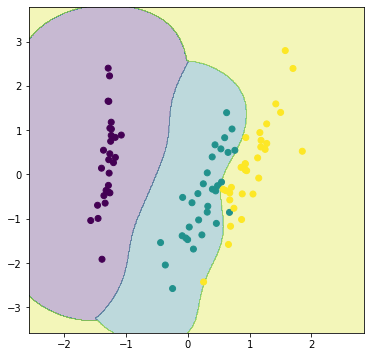

SVM:  0.9833333333333333


In [ ]:

from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1, gamma=1).fit(X_train,y_train)

###################### код для построения графика

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

###################### код для вычисления достоверности классификатора

from sklearn.metrics import accuracy_score
print('SVM: ',
       accuracy_score(model.predict(X_test), y_test))

### 5. Логистическая регрессия

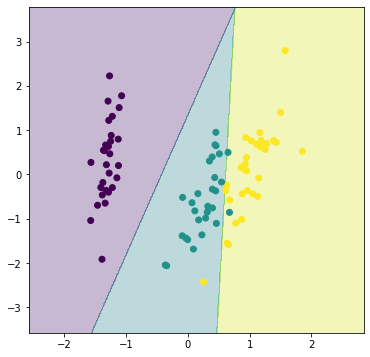

LogisticRegression:  0.9333333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(X_train,y_train)

###################### код для построения графика

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

###################### код для вычисления достоверности классификатора

from sklearn.metrics import accuracy_score
print('LogisticRegression: ',
       accuracy_score(model.predict(X_test), y_test))

### 6. Байесовский наивный классификатор



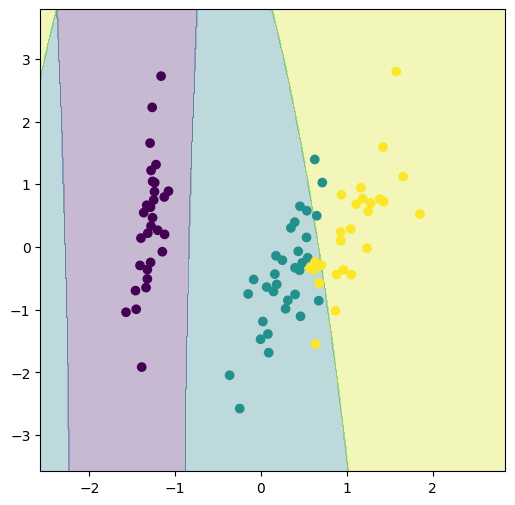

MultinomialNB:  0.8333333333333334


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train,y_train)

###################### код для построения графика

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

###################### код для вычисления достоверности классификатора

from sklearn.metrics import accuracy_score
print('GaussianNB: ',
       accuracy_score(model.predict(X_test), y_test))

## Автоматический выбор гиперпараметров модели

**GridSearchCV** – инструмент для автоматического подбора параметров моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Такой подход может быть весьма времязатратным.

**Параметры GridSearchCV**:

* **estimator** — модель которую хотим обучать (алгоритм);
* **param_grid** — передаем какие параметры хотим подбирать, GridSearchCV на всех параметрах попробует сделать обучение;
* **CV** — сколько разрезов кросс-валидации мы ходим сделать;
* **scoring** — выбор метрики ошибки (для разных задач можно выбрать разные функции ошибки).

**CV** – перекрёстная проверка (кросс-валидация, Cross-validation), метод, который показывает, что модель не переобучилась.

Принцип работы:

1. берется Датасет:  
```       
[****************]
```
2. делится на кусочки:      
```
[****|****|****|****]
```
3. делается указанное нами (4) количество прогонов этой модели:
```
[****|****|****|DDDD]
[****|****|DDDD|****]
[****|DDDD|****|****]
[DDDD|****|****|****]
```
Где |****| – одна из частей датасета, "DDDD" - часть датасета, на которой прогоняется модель.

Таким образом модель прогоняется на 4х кусках, т.е. 4 разные модели обучаются на 4х разных выборках. Если все 4 результата хороши, значит модель не переобучена.

https://newtechaudit.ru/gridsearchcv-pomoshhnik-v-vybore/

Рассмотрим на примере метода K ближайших соседей.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p=2)

# Получим список возможных параметров выбранной модели:
model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

Далее из документации библиотеки sklearn находим возможные значения параметров выбранного метода, и выбираем те, которые хотим проверить.

In [ ]:
from sklearn.model_selection import GridSearchCV

parametrs = {
	"algorithm": ['auto' 'ball_tree', 'kd_tree', 'brute'], # алгоритм, используемый для вычисления ближайших соседей.
 	"weights" : ['uniform', 'distance'], # весовая функция, используемая в прогнозировании.
  "n_neighbors": [1,3,5,7,9,11,13,15], # количество соседей
  "p": [1, 2, 3], # параметр мощности для метрики Минковского. При p = 2 - евклидова метрика
  }

GSCV = GridSearchCV(
    model,
    parametrs,
    cv = 3, # количество разбиений на кросс-валидацию ( < 3 делать не стоит)
    #scoring = 'neg_mean_absolute_error' # как мы будем оценивать модель (используем scoring нашей модели)
)

GSCV.fit(X_train, y_train)
print(GSCV.best_params_)

{'algorithm': 'kd_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
144 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/s

Лучший набор параметров для заданного набора данных:
```
{'algorithm': 'kd_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
```

# Домашние задания

1) Построить модель линейной регрессии для данных из файла data.csv

https://drive.google.com/file/d/1MK4yFiHcsKST5sDkfpFCPDrgyVp_eCQu/view?usp=sharing

Найти коэффициенты регрессии и построить график.



Коэффициент детерминации 0.7329747078314965
Интерсепт b = 8499.599649933216
Коэффициент наклона w = -0.0214489635917023


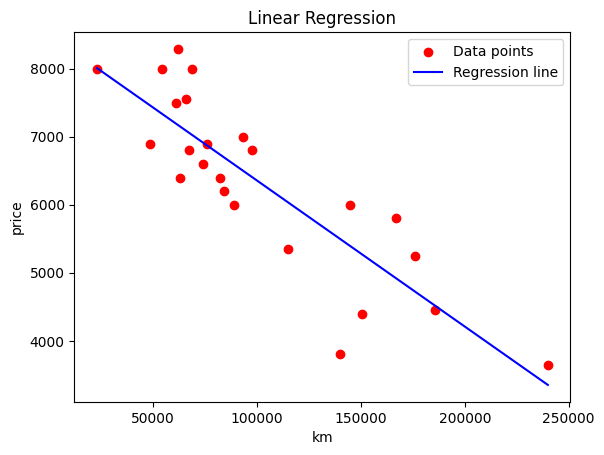

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file_path = "data.csv"
df = pd.read_csv(file_path)

X = df["km"].values.reshape(-1, 1)
y = df["price"].values

reg = LinearRegression().fit(X, y)

intercept = reg.intercept_
coefficient = reg.coef_[0]

print("Коэффициент детерминации", reg.score(X, y)) #коэффициент детерминации
print("Интерсепт b =", intercept)
print("Коэффициент наклона w =", coefficient)

X_test = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_test = reg.predict(X_test)

plt.figure()
plt.scatter(X, y, c='red', label='Data points')
plt.plot(X_test, y_test, c='blue', label='Regression line')
plt.xlabel('km')
plt.ylabel('price')
plt.title('Linear Regression')
plt.legend()
plt.show()

2) Модели классификации

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Найти лучший классификатор (и лучшие параметры) для этого набора данных.
3. Выведите в графическом виде все примеры, где лучший классификатор ошибся.
4. Сравнить результат с классификацией датасета digits, предобработанного алгоритмом t-SNE.

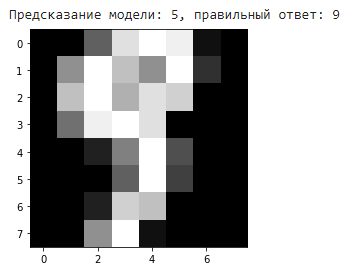

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': (0.9770877531340405, RandomForestClassifier(n_estimators=200, random_state=88)), 'SVM': (0.9921461480767171, SVC(C=10, random_state=88)), 'KNN': (0.988867459552127, KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')), 'Logistic Regression': (0.963319404264438, LogisticRegression(C=0.1, random_state=88))}
Лучший классификатор: SVM
Лучшие параметры: SVC(C=10, random_state=88)
Точность на тестовой выборке: 0.99


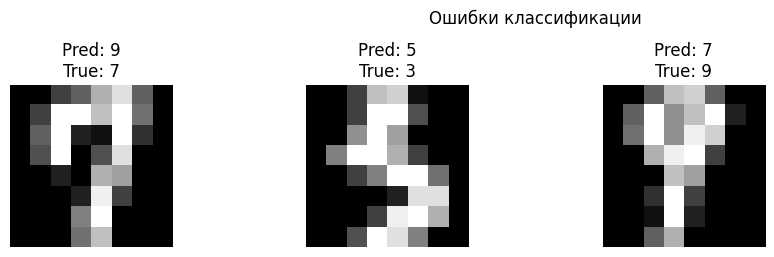

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=88)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}

rf = RandomForestClassifier(random_state=88)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_rf.fit(X_train, y_train)

svc = SVC(random_state=88)
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_svc.fit(X_train, y_train)

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_knn.fit(X_train, y_train)

lr = LogisticRegression(random_state=88)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_lr.fit(X_train, y_train)

classifiers = {
    "Random Forest": (grid_rf.best_score_, grid_rf.best_estimator_),
    "SVM": (grid_svc.best_score_, grid_svc.best_estimator_),
    "KNN": (grid_knn.best_score_, grid_knn.best_estimator_),
    "Logistic Regression": (grid_lr.best_score_, grid_lr.best_estimator_)
}

print(classifiers)

best_name, (best_score, best_classifier) = max(classifiers.items(), key=lambda item: item[1][0])

best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Лучший классификатор: {best_name}")
print(f"Лучшие параметры: {best_classifier}")
print(f"Точность на тестовой выборке: {accuracy:.2f}")

errors = np.where(y_pred != y_test)[0]

plt.figure(figsize=(12, 8))
for i, idx in enumerate(errors[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.suptitle("Ошибки классификации")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

perplexity=5
learning_rate=1000
early_exaggeration=6
n_components = 2

digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=88)

tsne_train = TSNE(n_components=n_components,
                perplexity=perplexity,
                learning_rate=learning_rate,
                early_exaggeration=early_exaggeration,
                random_state=88)

X_train_tsne = tsne_train.fit_transform(X_train)

tsne_test = TSNE(n_components=n_components,
                perplexity=perplexity,
                learning_rate=learning_rate,
                early_exaggeration=early_exaggeration,
                random_state=88)

X_test_tsne = tsne_test.fit_transform(X_test)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}

rf = RandomForestClassifier(random_state=88)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_rf.fit(X_train_tsne, y_train)

svc = SVC(random_state=88)
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_svc.fit(X_train_tsne, y_train)

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_knn.fit(X_train_tsne, y_train)

lr = LogisticRegression(random_state=88)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_lr.fit(X_train_tsne, y_train)

classifiers = {
    "Random Forest": (grid_rf.best_score_, grid_rf.best_estimator_),
    "SVM": (grid_svc.best_score_, grid_svc.best_estimator_),
    "KNN": (grid_knn.best_score_, grid_knn.best_estimator_),
    "Logistic Regression": (grid_lr.best_score_, grid_lr.best_estimator_)
}

print(classifiers)

best_name, (best_score, best_classifier) = max(classifiers.items(), key=lambda item: item[1][0])

best_classifier.fit(X_train_tsne, y_train)
y_pred = best_classifier.predict(X_test_tsne)
accuracy = accuracy_score(y_test, y_pred)

print(f"Лучший классификатор: {best_name}")
print(f"Лучшие параметры: {best_classifier}")
print(f"Точность на тестовой выборке: {accuracy:.2f}")

{'Random Forest': (0.986257366334512, RandomForestClassifier(random_state=88)), 'SVM': (0.9816693453337619, SVC(C=10, random_state=88)), 'KNN': (0.9869109611057538, KNeighborsClassifier(metric='euclidean', n_neighbors=3)), 'Logistic Regression': (0.8912825458052074, LogisticRegression(C=0.1, random_state=88))}
Лучший классификатор: KNN
Лучшие параметры: KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Точность на тестовой выборке: 0.14


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3) Подумайте, как с помощью рассмотренных методов кластеризации и классификации библиотеки sklearn (без использования сторонних библиотек таких, как opencv) определить число на картинке:


image.png

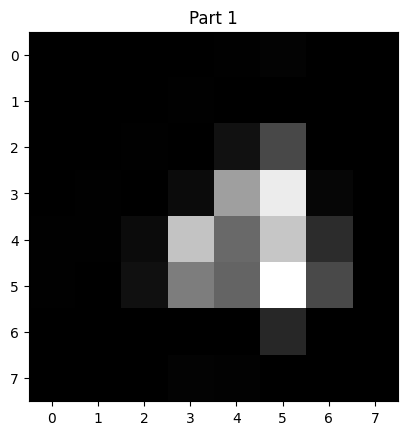

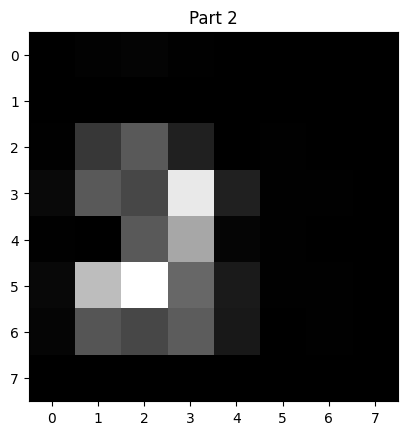

Результаты анализа частей: [4] [4]


In [ ]:
image_base64 = "iVBORw0KGgoAAAANSUhEUgAAABsAAAAUCAYAAAB8gkaAAAABT0lEQVRIie2UTyiDcRjHvy+rxWE5KOR10S6SKEcuclNOI7mtHOay2kEoh9UOK23RLtpFrVYrNAcHtYvmZHHRylGRi39JkmXFx4EceN+9Cy3KU0/96vn2fJ7v7/n1MyShGkVdrUD/sH/Yd2FuAYJ9y2rn4ITu4E2DUv5+RyB2Gd6BrY003Oct68NTEYbM13NdXwgAX6t9P3tYdwjIIc8YUKjU4D2PgPmBL8AugJF6od5gdbCWcQCaK2gsdza6fCgj7df2k6Tyo6Sy4y6K5+vKBrp07aD7MEEHAKvhGWKxReKZXeCSeCKKaTPxZgkestOO7i2cPSuaWNJtkymX4WhImSs0UlhQoy/pqDXk9Ov3BEXRL8P4/KwDmTMlJ9s1F5xVi9eU292gk3xK8bU9y1Yux3FuDpSKlCxLx7kVLZ561OY1VcUlVOHsB+M3fVd/GPYCVR7Z9bn+APIAAAAASUVORK5CYII="
from PIL import Image
import numpy as np
import io

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=87)

#решила использовать SVC со стандартными параметрами, не принципиально какой использовать классификатор, главное, чтобы была хорошая точность
classifier = SVC(random_state=55)
classifier.fit(X_train, y_train)

image_data = base64.b64decode(image_base64)
image = Image.open(io.BytesIO(image_data))
gray_image = image.convert('L')
resized_image = gray_image.resize((16, 8), Image.LANCZOS)
image_array = np.asarray(resized_image, dtype=np.float32)

def analyze_part(d):
    data = [float(ele) / 16.0 for ele in d.flatten()]
    imgdata = np.reshape(data, (1, 64))
    return classifier.predict(imgdata)

part_width = 8
part1 = image_array[:, :part_width]
part2 = image_array[:, part_width:]

from matplotlib import pyplot as plt

plt.imshow(part1, cmap='gray')
plt.title("Part 1")
plt.show()

plt.imshow(part2, cmap='gray')
plt.title("Part 2")
plt.show()

result1 = analyze_part(part1)
result2 = analyze_part(part2)

print('Результаты анализа частей:', result1, result2)

#вторая часть картинки выглядит очень нечетко. Даже человек не факт что сможет разобрать тут двойку.

Пришлось немного подрезать края изображения, что увеличило "информативную" часть изображения.

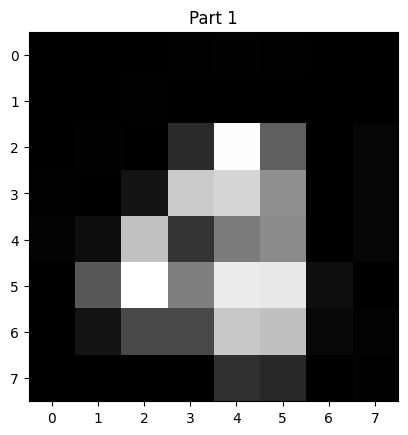

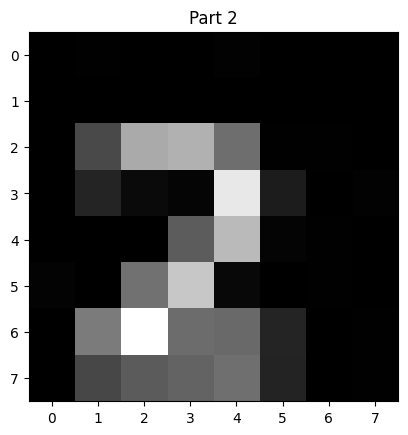

Результаты анализа частей: [4] [2]


In [ ]:
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
import io
import base64
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from PIL import Image
import base64
from io import BytesIO
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=87)

classifier = SVC(random_state=55)
classifier.fit(X_train, y_train)

image_data = base64.b64decode(image_base64)
image = Image.open(io.BytesIO(image_data))
gray_image = image.convert('L')
resized_image = gray_image.resize((20, 12), Image.LANCZOS)
image_array = np.asarray(resized_image, dtype=np.float32)

def crop_edges(image_array, crop_pixels):
    return image_array[crop_pixels:-crop_pixels, crop_pixels:-crop_pixels]

cropped_image_array = crop_edges(image_array, 2)

part_width = cropped_image_array.shape[1] // 2

part1 = cropped_image_array[:, :part_width]
part2 = cropped_image_array[:, part_width:]

def analyze_part(d):
    data = [float(ele) / 16.0 for ele in d.flatten()]
    imgdata = np.reshape(data, (1, 64))
    return classifier.predict(imgdata)

from matplotlib import pyplot as plt
plt.imshow(part1, cmap='gray')
plt.title("Part 1")
plt.show()

plt.imshow(part2, cmap='gray')
plt.title("Part 2")
plt.show()

result1 = analyze_part(part1)
result2 = analyze_part(part2)

print('Результаты анализа частей:', result1, result2)